In [3]:
import math
import json
from pprint import pprint
import numpy as np 
import matplotlib.pyplot as plt 
from numpy import genfromtxt
import os

with open('QTable.json') as f:
    Qtable = json.load(f)
print("Length of QTable: " + str(len(Qtable)))

Length of QTable: 157


[0, 2, 1, 3, 4, 5, 6]
[0, 2, 4, 1, 3, 5, 6]
[0, 270, 90, 180]
Qlearning_data_2/QTable_Alpha_0_1_Gamma_0_5_Decay_0_99.json
Length of QTable: 201


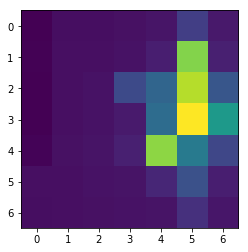

In [9]:
file_list = [
    "Qlearning_data_2/QTable_Alpha_0_1_Gamma_0_5_Decay_0_99.json"
]

xs = []; zs = []; yaws = []
for key in Qtable:
    values = key.split(":")
    x = int(values[0])
    z = int(values[1])
    yaw = int(values[2])
    if x not in xs: xs.append(x)
    if z not in zs: zs.append(z)
    if yaw not in yaws: yaws.append(yaw)
    
print(xs); print(zs); print(yaws)


def printGrid(xs,zs,Qtable):

    xLen = max(xs); zLen = max(zs);  
    grid = np.ones(((xLen+1)*36,(zLen+1)*36))
    block = np.ones((int(36),int(36)))

    for key in Qtable:
        values = key.split(":")
        x = float(values[0])
        z = float(values[1])
        reward = max(Qtable[key])

        gridXStart = int(x*36)
        gridXEnd = int(x*36 + 36)
        gridZStart = int(z*36)
        gridZEnd = int(z*36 + 36)

        grid[gridXStart:gridXEnd,gridZStart:gridZEnd] += block*(reward/4)

    ax = plt.axes()
    ax.imshow(grid)

    ax.set_xticks([(i*36 + 18 ) for i in range(xLen+1)])
    ax.set_xticklabels([str(i) for i in range(xLen+1)])
    ax.set_yticks([(i*36 + 18 ) for i in range(xLen+1)])
    ax.set_yticklabels([str(i) for i in range(xLen+1)])
    
    

for file in file_list:
    print(file)
    with open(file) as f:
        Qtable = json.load(f)
    print("Length of QTable: " + str(len(Qtable)))
    printGrid(xs,zs,Qtable)